# Relative Strength Indicator RSI

The relative strength indicator compreses a lookback period which it uses to compute the magnitude  
of the average of gains/price increases over that period, as well as the magnitude of the magnitude  
of the averages of losses/price decreases over that period. Then, it computes the RSI value that  
normalizes the signal value to stay between 0 and 100, and attempts to capture if there have been  
many more losses relative to the gains RSI values over 50% indicate an uptrend, while RSI values  
below 50% indicate a downtrand

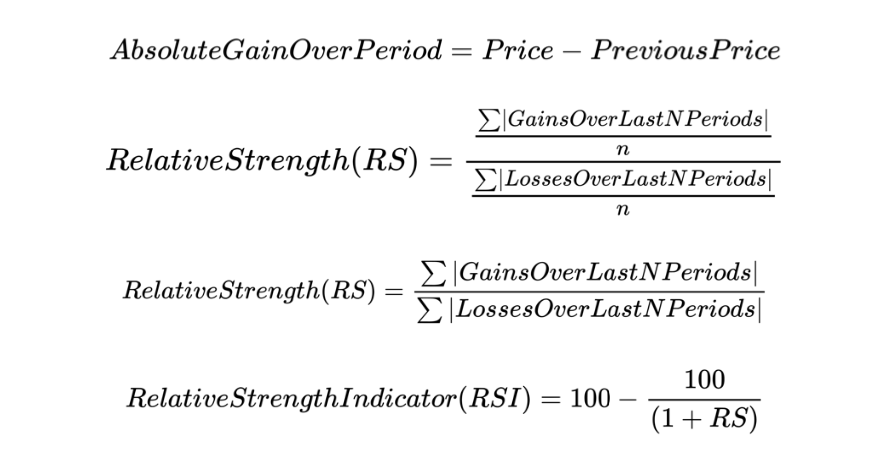


In [1]:
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('data/ATOMUSDT.csv')
close = df['Close']

In [4]:
# Look back period to compute gains and losses
time_period = 20

gain_history = []
loss_history = []

# Track the avg gain and loss values
avg_gain_values = []
avg_loss_values = []

# Track computed RSI values
rsi_values = []

# current_price - last_price > 0 => gian
# current_price - last_price < 0 => loss
last_price = 0

for close_price in close:
    if last_price == 0:
        last_price = close_price
    
    gain_history.append(max(0, close_price - last_price))
    loss_history.append(max(0, last_price - close_price))
    last_price = close_price
    
    if len(gain_history) > time_period:
        del(gain_history[0])
        del(loss_history[0])
        
    avg_gain = stats.mean(gain_history)
    avg_gain_values.append(avg_gain)
    avg_loss = stats.mean(loss_history)
    avg_loss_values.append(avg_loss)
    
    rs = 0
    
    # To avoid division by 0, 2hich is undefined
    if avg_loss > 0:
        rs = avg_gain / avg_loss
        
    rsi = 100 - (100 / (1 + rs))
    rsi_values.append(rsi)
    

In [5]:
df_data = df.assign(ClosePrice=pd.Series(close, index=df.index))
df_data = df_data.assign(RelativeStrengthAvgGainOver20Days=pd.Series(avg_gain_values, index=df.index))
df_data = df_data.assign(RelativeStrengthAvgLossOver20Days=pd.Series(avg_loss_values, index=df.index))
df_data = df_data.assign(RelativeStrengthIndicatorOver20Days=pd.Series(rsi_values, index=df.index))

close_price = df_data['ClosePrice']
rs_gain = df_data['RelativeStrengthAvgGainOver20Days']
rs_loss = df_data['RelativeStrengthAvgLossOver20Days']
rsi = df_data['RelativeStrengthIndicatorOver20Days']

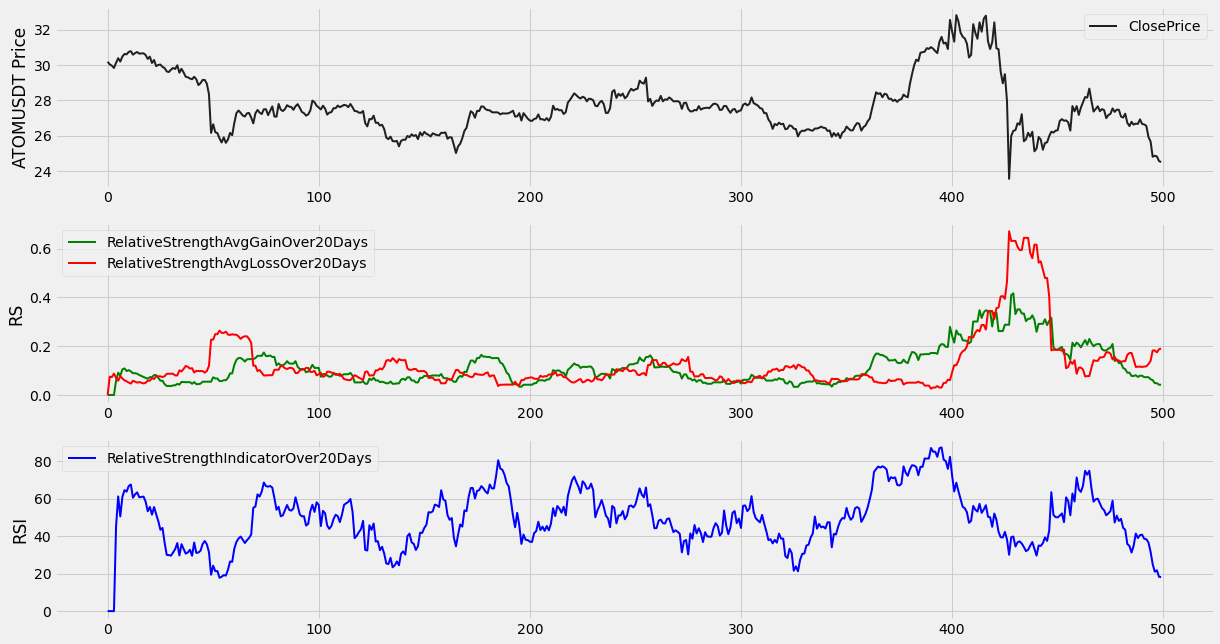

In [7]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax1 = fig.add_subplot(311, ylabel='ATOMUSDT Price')
close_price.plot(ax=ax1, color='#202020', lw=2., legend=True)

ax2 = fig.add_subplot(312, ylabel='RS')
rs_gain.plot(ax=ax2, color='g', lw=2., legend=True)
rs_loss.plot(ax=ax2, color='r', lw=2., legend=True)

ax3 = fig.add_subplot(313, ylabel='RSI')
rsi.plot(ax=ax3, color='b', lw=2., legend=True)
plt.show()